**`Import and load dataset`**

---




In [1]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.1 MB/s eta 0:00:00


In [2]:
from datasets import load_dataset

In [3]:
#Importing BBC News Dataset
datasets = load_dataset("SetFit/bbc-news")

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/SetFit___json/SetFit--bbc-news-dbeb222bfdd4d6ed/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [4]:
#Diplaying structure of BBC News Dataset
datasets

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 1225
    })
    test: Dataset({
        features: ['text', 'label', 'label_text'],
        num_rows: 1000
    })
})

In [5]:
datasets["train"][1]

{'text': 'china aviation seeks rescue deal scandal-hit jet fuel supplier china aviation oil has offered to repay its creditors $220m (£117m) of the $550m it lost on trading in oil futures.  the firm said it hoped to pay $100m now and another $120m over eight years. with assets of $200m and liabilities totalling $648m  it needs creditors  backing for the offer to avoid going into bankruptcy. the trading scandal is the biggest to hit singapore since the $1.2bn collapse of barings bank in 1995. chen jiulin  chief executive of china aviation oil (cao)  was arrested by at changi airport by singapore police on 8 december. he was returning from china  where he had headed when cao announced its trading debacle in late-november. the firm had been betting heavily on a fall in the price of oil during october  but prices rose sharply instead.  among the creditors whose backing cao needs for its restructuring plan are banking giants such as barclay s capital and sumitomo mitsui  as well as south ko

**Data Pre-processing**

---



In [6]:
pip install nltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words=stopwords.words('english')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [9]:
import pandas as pd
import numpy as np

In [10]:
df = pd.DataFrame.from_dict(datasets["train"])
print(len(df))

1225


In [11]:
#defining function for Stopwords removal
def stopwords_removal(column_name):
  counter = 0
  temp_arr = []
  for i in range(0, len(df)):
      counter += 1
      doc = df['text'][i]
      temp_arr.append(" ".join( token for token in nltk.word_tokenize(doc) if not token in stop_words))
     
  df[column_name] = temp_arr

In [12]:
#defining function for Lemmatization
def lemmatization(column_name):
  counter = 0
  for i in range(0, len(df)):
      counter += 1
      doc = df[column_name][i]
      df[column_name].replace(df[column_name][i], " ".join(lemmatizer.lemmatize(token) for token in nltk.word_tokenize(doc)), inplace = True)

In [13]:
print(df['text'][1])
stopwords_removal('text')
print(df['text'][1])

china aviation seeks rescue deal scandal-hit jet fuel supplier china aviation oil has offered to repay its creditors $220m (£117m) of the $550m it lost on trading in oil futures.  the firm said it hoped to pay $100m now and another $120m over eight years. with assets of $200m and liabilities totalling $648m  it needs creditors  backing for the offer to avoid going into bankruptcy. the trading scandal is the biggest to hit singapore since the $1.2bn collapse of barings bank in 1995. chen jiulin  chief executive of china aviation oil (cao)  was arrested by at changi airport by singapore police on 8 december. he was returning from china  where he had headed when cao announced its trading debacle in late-november. the firm had been betting heavily on a fall in the price of oil during october  but prices rose sharply instead.  among the creditors whose backing cao needs for its restructuring plan are banking giants such as barclay s capital and sumitomo mitsui  as well as south korean firm 

In [14]:
print(df['text'][1])
lemmatization('text')
print(df['text'][1])

china aviation seeks rescue deal scandal-hit jet fuel supplier china aviation oil offered repay creditors $ 220m ( £117m ) $ 550m lost trading oil futures . firm said hoped pay $ 100m another $ 120m eight years . assets $ 200m liabilities totalling $ 648m needs creditors backing offer avoid going bankruptcy . trading scandal biggest hit singapore since $ 1.2bn collapse barings bank 1995. chen jiulin chief executive china aviation oil ( cao ) arrested changi airport singapore police 8 december . returning china headed cao announced trading debacle late-november . firm betting heavily fall price oil october prices rose sharply instead . among creditors whose backing cao needs restructuring plan banking giants barclay capital sumitomo mitsui well south korean firm sk energy . immediate payment firm - china biggest jet fuel supplier - said would paying $ 30m resources . rest would come parent company china aviation oil holding company beijing . holding company owned chinese government hold

**Document Clustering**

---



In [15]:
df

,text,label,label_text
0,wale want rugby league training wale could fol...,2,sport
1,china aviation seek rescue deal scandal-hit je...,1,business
2,rock band u2 break ticket record u2 smashed ir...,3,entertainment
3,market signal brazilian recovery brazilian sto...,1,business
4,tough rule ringtone seller firm flout rule rin...,0,tech
...,...,...,...
1220,u economy show solid gdp growth u economy grow...,1,business
1221,microsoft release bumper patch microsoft warne...,0,tech
1222,stuart join norwich addicks norwich signed cha...,2,sport
1223,target better many economic target set lisbon ...,1,business


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
import sklearn.metrics as metrics
import sklearn.cluster as cluster
import matplotlib.pyplot as plt

In [17]:
# initialize the vectorizer
vectorizer = TfidfVectorizer()
# fit_transform applies TF-IDF to clean texts 
X = vectorizer.fit_transform(df['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


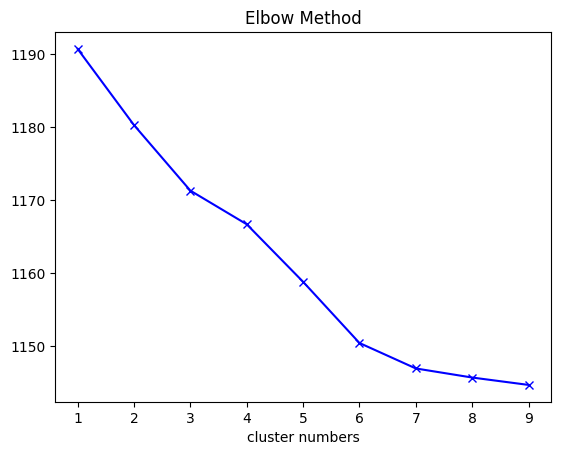

In [18]:
# Elbow method using MiniBatch K-means for finding optimum value of K
K = range(1,10)
SSE = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters = k)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [19]:
# training K-means with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [20]:
#hierarchical agglomorative clustering with Number of clusters = 5
# n_clusters = 5  
# clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward').fit(X.toarray())
# clusters = clustering.labels_

In [21]:
len(clusters)

1225

In [22]:
df['clusters'] = clusters

In [23]:
df

,text,label,label_text,clusters
0,wale want rugby league training wale could fol...,2,sport,4
1,china aviation seek rescue deal scandal-hit je...,1,business,2
2,rock band u2 break ticket record u2 smashed ir...,3,entertainment,2
3,market signal brazilian recovery brazilian sto...,1,business,2
4,tough rule ringtone seller firm flout rule rin...,0,tech,1
...,...,...,...,...
1220,u economy show solid gdp growth u economy grow...,1,business,2
1221,microsoft release bumper patch microsoft warne...,0,tech,1
1222,stuart join norwich addicks norwich signed cha...,2,sport,4
1223,target better many economic target set lisbon ...,1,business,2


In [24]:
#silhouette score
from sklearn.metrics import silhouette_score


labels = df['clusters']

silhouette_avg = silhouette_score(X, labels)
print(silhouette_avg)

0.013038480662332333


In [25]:
# Selecting random set of documents for topic modeling
df_random = df[:10]
df_random

,text,label,label_text,clusters
0,wale want rugby league training wale could fol...,2,sport,4
1,china aviation seek rescue deal scandal-hit je...,1,business,2
2,rock band u2 break ticket record u2 smashed ir...,3,entertainment,2
3,market signal brazilian recovery brazilian sto...,1,business,2
4,tough rule ringtone seller firm flout rule rin...,0,tech,1
5,iraq advice claim spark new row tory say minis...,4,politics,3
6,brit debate urban music joss stone 17-year-old...,3,entertainment,2
7,dirty den demise seen 14m 14 million people sa...,3,entertainment,2
8,lib dems new election pr chief lib dems appoin...,4,politics,3
9,bbc poll indicates economic gloom citizen majo...,1,business,2


In [26]:
# Merging documents based on clusters
cluster_data = df_random.groupby('clusters')['text'].apply(' '.join).reset_index()

In [27]:
cluster_data

,clusters,text
0,1,tough rule ringtone seller firm flout rule rin...
1,2,china aviation seek rescue deal scandal-hit je...
2,3,iraq advice claim spark new row tory say minis...
3,4,wale want rugby league training wale could fol...


**Topic Modelling**

---



In [28]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# copying actual data to original_df before doing topic modelling
original_df = cluster_data.copy()
original_df 



,clusters,text
0,1,tough rule ringtone seller firm flout rule rin...
1,2,china aviation seek rescue deal scandal-hit je...
2,3,iraq advice claim spark new row tory say minis...
3,4,wale want rugby league training wale could fol...


In [30]:
import pandas as pd
import numpy as np
import gensim
from gensim import corpora, models


In [31]:
stop_words = stopwords.words('english')
cluster_data['text'] = cluster_data['text'].apply(lambda x: [word for word in simple_preprocess(x) if word not in stop_words])

In [32]:
# LDA is applied on each cluster and keyword is printed along with perplexity score
topics = {}
for i in range(cluster_data['clusters'].nunique()):
  txt = cluster_data['text'][i]
  dictionary = Dictionary([txt])
  corpus = [dictionary.doc2bow(text) for text in [txt]]
  num_topics = 1
  lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
  perplexity = lda_model.log_perplexity(corpus)
  # coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
  # coherence_lda = coherence_model_lda.get_coherence()
  topics[i] = lda_model.print_topics(num_words=10)
  n_top_words = 10
  for topic_idx, topic in lda_model.show_topics(num_topics=1, num_words=n_top_words, formatted=False):
    print(" ".join([word for word, _ in topic]))
    keyword = " ".join([word for word, _ in topic])
  original_df.loc[i, 'keyword'] = keyword
  original_df.loc[i, 'perplexity_score'] = perplexity
  print('perplexity Score:', perplexity)



said firm rule consumer service new mobile phone flynn mr
perplexity Score: -5.3756250474795655
music urban people black joss stone country said year award
perplexity Score: -6.82165369866887
lord goldsmith advice party said legal general new mr claim
perplexity Score: -5.596160149789071
wale st saint helen rugby league england training coach week
perplexity Score: -4.874247848123744


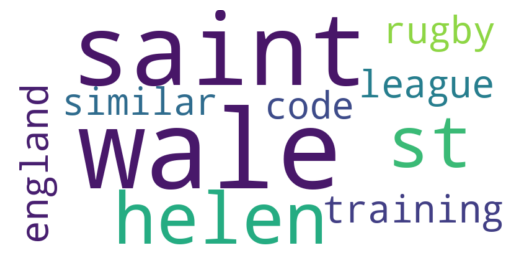

In [33]:
# Word cloud is plotted to visualize sequence of words in each topics
from wordcloud import WordCloud
import matplotlib.pyplot as plt



txt = cluster_data['text'][3]
dictionary = Dictionary([txt])
corpus = [dictionary.doc2bow(text) for text in [txt]]

# Train the LDA model on the document-term matrix
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=1, id2word=dictionary, passes=20)

topics = lda_model.show_topics(num_topics=1, num_words=10, formatted=False)
topic_words = []
for topic in topics:
    topic_words += [word[0] for word in topic[1]]

# Generate a word cloud from the most common words in the LDA model
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(topic_words))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
original_df

,clusters,text,keyword,perplexity_score
0,1,tough rule ringtone seller firm flout rule rin...,said firm rule consumer service new mobile pho...,-5.375625
1,2,china aviation seek rescue deal scandal-hit je...,music urban people black joss stone country sa...,-6.821654
2,3,iraq advice claim spark new row tory say minis...,lord goldsmith advice party said legal general...,-5.596160
3,4,wale want rugby league training wale could fol...,wale st saint helen rugby league england train...,-4.874248


**Document Summarization**

---



In [35]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 69.3 MB/s eta 0:00:00


In [36]:
from transformers import pipeline

In [37]:
# Summary of selected topic is generated using summarization pipeline in hugging face

# Load the summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# summarizer = pipeline("summarization", model="t5-large")

# Input text to summarize
document = original_df['text'][2]

# Generate the summary
summary = summarizer(document, max_length=300, min_length=10)


In [38]:
# Print the summary
print(summary)

[{'summary_text': 'Liberal democrat say want publication full legal advice given attorney general. Government consistently refused publish lord goldsmith advice legality war - saying paper always kept confidential. Lord goldsmith said: parliamentary answer march 17 2003 explained genuinely held independent view military action lawful existing security council resolution.'}]


In [39]:
original_df['text'][2]

'iraq advice claim spark new row tory say minister must respond parliament claim legal advice used justify iraq war drawn number 10. downing street denied claim made new book attorney general lord goldsmith advice . lord goldsmith also denied saying leaned way . conservative liberal democrat say want publication full legal advice given attorney general . government consistently refused publish lord goldsmith advice legality war - saying paper always kept confidential . short statement lord goldsmith position presented written parliamentary answer 17 march 2003 - crucial common vote military action . said plain iraq continued material breach un resolution 1441. new book lawless world philippe sand qc international law professor suggests parliamentary answer written downing street . according mr sand lord goldsmith warned tony blair document 7 march 2003 use force iraq could illegal would safer seek second un resolution sanctioning military action . mr sand told newsnight government prep

In [40]:
original_df['text'][0]

'tough rule ringtone seller firm flout rule ringtones mobile extra sold could cut uk phone network . rule allow offender cut let consumer know exactly get money turn service . first month new rule seen least ten firm suspended clean way work . rule brought ensure problem plaguing net user spread mobile phone . last couple year ringtones wallpaper screensavers lot extra phone become hugely popular . fierce competition making difficult firm get ware front consumer said jeremy flynn head third party service vodafone . operator portal going quite heavy marketing cost problem people discover service said . combat many ringtone mobile content seller started using new tactic squeeze cash customer . tactic involved signing people subscription give instance several ringtones per week month instead single track thought getting . mr flynn said move using subscription happened space week end 2004. website grumbletext.co.uk started getting report customer racking large bill phone content know signe